<a href="https://colab.research.google.com/github/AkashG1226/Machine-Leaning-Project-/blob/main/cricket_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cricket = pd.read_csv('/content/drive/MyDrive/cricket.csv')

In [ ]:
cricket


,Unnamed: 0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,0,SR Tendulkar (INDIA),1989-2013,664,782,74,34357,248,48.52,50817+,67.58,100,164,34,4076,264
1,1,KC Sangakkara (Asia/ICC/SL),2000-2015,594,666,67,28016,319,46.77,42086,66.56,63,153,28,3015,159
2,2,RT Ponting (AUS/ICC),1995-2012,560,668,70,27483,257,45.95,40130,68.48,71,146,39,2781,246
3,3,DPMD Jayawardene (Asia/SL),1997-2015,652,725,62,25957,374,39.15,40100,64.73,54,136,47,2679,170
4,4,JH Kallis (Afr/ICC/SA),1995-2014,519,617,97,25534,224,49.10,45346,56.30,62,149,33,2455,254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,83,DB Vengsarkar (INDIA),1976-1992,245,305,41,10376,166,39.30,15989+,50.04,18,58,22,737,41
84,84,ME Trescothick (ENG),2000-2006,202,268,16,10326,219,40.97,15903,64.93,26,52,25,1382,84
85,85,G Gambhir (INDIA),2003-2016,242,283,18,10324,206,38.95,14994,68.85,20,63,20,1188,37
86,86,MD Crowe (NZ),1982-1995,220,271,29,10148,299,41.93,18666,54.36,21,52,12,1037,56


In [ ]:
cricket.isnull().sum()

,0
Unnamed: 0,0
Player,0
Span,0
Mat,0
Inns,0
NO,0
Runs,0
HS,0
Ave,0
BF,0


In [ ]:
cricket

,Unnamed: 0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,0,SR Tendulkar (INDIA),1989-2013,664,782,74,34357,248,48.52,50817+,67.58,100,164,34,4076,264
1,1,KC Sangakkara (Asia/ICC/SL),2000-2015,594,666,67,28016,319,46.77,42086,66.56,63,153,28,3015,159
2,2,RT Ponting (AUS/ICC),1995-2012,560,668,70,27483,257,45.95,40130,68.48,71,146,39,2781,246
3,3,DPMD Jayawardene (Asia/SL),1997-2015,652,725,62,25957,374,39.15,40100,64.73,54,136,47,2679,170
4,4,JH Kallis (Afr/ICC/SA),1995-2014,519,617,97,25534,224,49.10,45346,56.30,62,149,33,2455,254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,83,DB Vengsarkar (INDIA),1976-1992,245,305,41,10376,166,39.30,15989+,50.04,18,58,22,737,41
84,84,ME Trescothick (ENG),2000-2006,202,268,16,10326,219,40.97,15903,64.93,26,52,25,1382,84
85,85,G Gambhir (INDIA),2003-2016,242,283,18,10324,206,38.95,14994,68.85,20,63,20,1188,37
86,86,MD Crowe (NZ),1982-1995,220,271,29,10148,299,41.93,18666,54.36,21,52,12,1037,56


In [ ]:
cricket.drop(['Span'], axis=1, inplace=True)

In [ ]:
cricket

,Unnamed: 0,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,0,SR Tendulkar (INDIA),664,782,74,34357,248,48.52,50817+,67.58,100,164,34,4076,264
1,1,KC Sangakkara (Asia/ICC/SL),594,666,67,28016,319,46.77,42086,66.56,63,153,28,3015,159
2,2,RT Ponting (AUS/ICC),560,668,70,27483,257,45.95,40130,68.48,71,146,39,2781,246
3,3,DPMD Jayawardene (Asia/SL),652,725,62,25957,374,39.15,40100,64.73,54,136,47,2679,170
4,4,JH Kallis (Afr/ICC/SA),519,617,97,25534,224,49.10,45346,56.30,62,149,33,2455,254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,83,DB Vengsarkar (INDIA),245,305,41,10376,166,39.30,15989+,50.04,18,58,22,737,41
84,84,ME Trescothick (ENG),202,268,16,10326,219,40.97,15903,64.93,26,52,25,1382,84
85,85,G Gambhir (INDIA),242,283,18,10324,206,38.95,14994,68.85,20,63,20,1188,37
86,86,MD Crowe (NZ),220,271,29,10148,299,41.93,18666,54.36,21,52,12,1037,56


In [ ]:
cricket.head(12)

,Unnamed: 0,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,0,SR Tendulkar (INDIA),664,782,74,34357,248,48.52,50817+,67.58,100,164,34,4076,264
1,1,KC Sangakkara (Asia/ICC/SL),594,666,67,28016,319,46.77,42086,66.56,63,153,28,3015,159
2,2,RT Ponting (AUS/ICC),560,668,70,27483,257,45.95,40130,68.48,71,146,39,2781,246
3,3,DPMD Jayawardene (Asia/SL),652,725,62,25957,374,39.15,40100,64.73,54,136,47,2679,170
4,4,JH Kallis (Afr/ICC/SA),519,617,97,25534,224,49.10,45346,56.30,62,149,33,2455,254
5,5,R Dravid (Asia/ICC/INDIA),509,605,72,24208,270,45.41,46564,51.98,48,146,21,2604,66
6,6,V Kohli (INDIA),473,527,77,24130,254,53.62,30483,79.15,71,125,33,2400,258
7,7,BC Lara (ICC/WI),430,521,38,22358,400,46.28,32839,68.08,53,111,33,2601,221
8,8,ST Jayasuriya (Asia/SL),586,651,35,21032,340,34.14,25910,81.17,42,103,53,2486,352
9,9,S Chanderpaul (WI),454,553,94,20988,203,45.72,40150,52.27,41,125,21,2041,126


<Axes: >

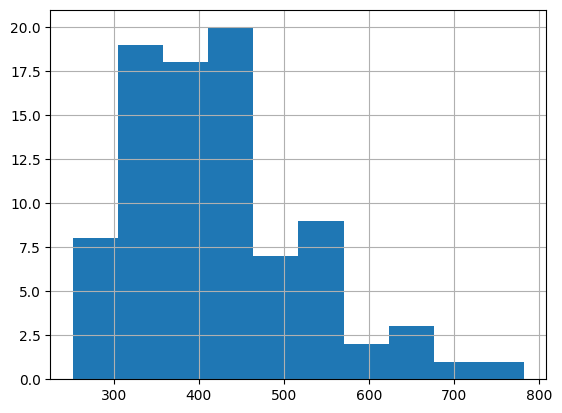

In [ ]:
cricket['Inns'].hist()

<Axes: >

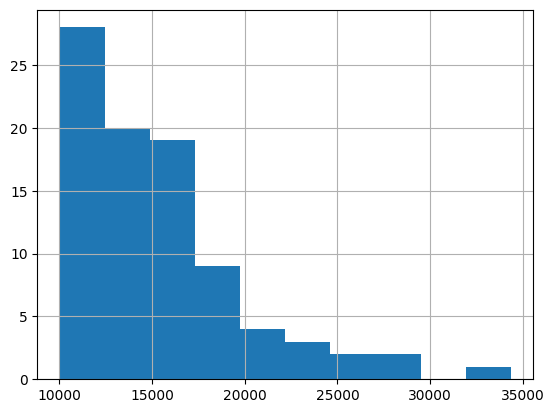

In [ ]:
cricket['Runs'].hist()

<Axes: >

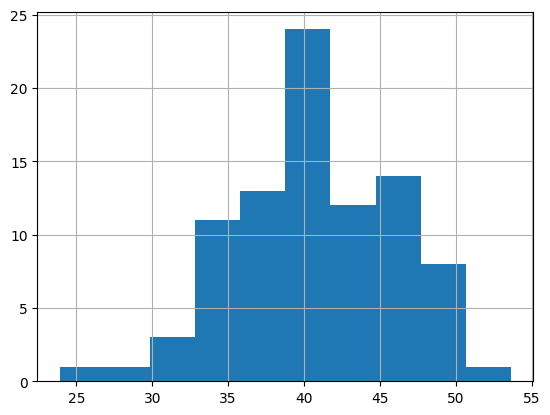

In [ ]:
cricket['Ave'].hist()

In [ ]:
cricket.columns

Index(['Unnamed: 0', 'Player', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF',
       'SR', '100', '50', '0', '4s', '6s'],
      dtype='object')

In [ ]:
cricket.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
cricket

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,SR Tendulkar (INDIA),664,782,74,34357,248,48.52,50817+,67.58,100,164,34,4076,264
1,KC Sangakkara (Asia/ICC/SL),594,666,67,28016,319,46.77,42086,66.56,63,153,28,3015,159
2,RT Ponting (AUS/ICC),560,668,70,27483,257,45.95,40130,68.48,71,146,39,2781,246
3,DPMD Jayawardene (Asia/SL),652,725,62,25957,374,39.15,40100,64.73,54,136,47,2679,170
4,JH Kallis (Afr/ICC/SA),519,617,97,25534,224,49.10,45346,56.30,62,149,33,2455,254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,DB Vengsarkar (INDIA),245,305,41,10376,166,39.30,15989+,50.04,18,58,22,737,41
84,ME Trescothick (ENG),202,268,16,10326,219,40.97,15903,64.93,26,52,25,1382,84
85,G Gambhir (INDIA),242,283,18,10324,206,38.95,14994,68.85,20,63,20,1188,37
86,MD Crowe (NZ),220,271,29,10148,299,41.93,18666,54.36,21,52,12,1037,56


In [ ]:
x = cricket[['Mat', 'Inns', 'Runs', 'Ave']]
y = cricket['SR']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [2]:
model=LogisticRegression()


NameError: name 'LogisticRegression' is not defined